# MSDS Assignment 5 Practical Machine Learning
## Data Analysis in Python for ABIDE data

Assignment 5 Apoorv Saraogee
Spring 2022 MSDS 499 Practical Machine Learning

In [2]:
import pandas
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
import nibabel as nib
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from nilearn import plotting
#5fold cross validation
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=True)

2024-08-09 15:24:25.556457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


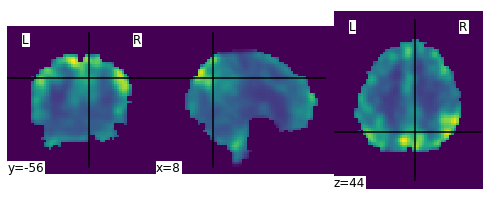

In [4]:
#Loading a test image and visualizing using nibabel package
img = nib.load('Caltech_0051487_reho.nii')
gg=img.get_fdata()
plotting.plot_img(img)
plt.show()

In [5]:
# get data file names and raw data from images
import os
path1 =r'/Users/apoorvsara/Documents/autism/cpac/nofilt_noglobal/reho'
path2 =r'/Users/apoorvsara/Documents/controls/cpac/nofilt_noglobal/reho'
autism = [os.path.basename(x) for x in glob.glob('/Users/apoorvsara/Documents/autism/cpac/nofilt_noglobal/reho/**.nii.gz')]
controls = [os.path.basename(x) for x in glob.glob('/Users/apoorvsara/Documents/controls/cpac/nofilt_noglobal/reho/**.nii.gz')]
ocontrol_scans = np.array([nib.load(path2+'/'+path).get_fdata() for path in controls])
oautism_scans = np.array([nib.load(path1+'/'+path).get_fdata() for path in autism])

In [203]:
#Output variable
y=np.zeros(800)
y[400:800]=1
y.shape

#Multiple input variables or features

Xo=np.concatenate((oautism_scans[0:400], ocontrol_scans[0:400]))

Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, y, test_size=0.25, random_state=1)

Xo_train, Xo_val, yo_train, yo_val = train_test_split(Xo_train, yo_train, test_size=(1/3), random_state=1) # 0.25 x 0.8 = 0.2


In [9]:
#Base LeNet model for neural networks
lenet5 = keras.models.Sequential()
lenet5.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(61, 73, 61)))
lenet5.add(keras.layers.MaxPool2D(strides=2))
lenet5.add(keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
lenet5.add(keras.layers.MaxPool2D(strides=2))
lenet5.add(keras.layers.Flatten())
lenet5.add(keras.layers.Dense(256, activation='relu'))
lenet5.add(keras.layers.Dense(84, activation='relu'))
lenet5.add(keras.layers.Dense(10, activation='softmax'))
lenet5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

#Base LeNet model for neural networks -3D version
mlenet5 = keras.models.Sequential()
mlenet5.add(keras.layers.Conv3D(filters=32, kernel_size=(5,5,5), padding='same', activation='relu', input_shape=(61, 73, 61,1)))
mlenet5.add(keras.layers.MaxPool3D(strides=2))
mlenet5.add(keras.layers.Conv3D(filters=48, kernel_size=(5,5,5), padding='valid', activation='relu'))
mlenet5.add(keras.layers.MaxPool3D(strides=2))
mlenet5.add(keras.layers.Flatten())
mlenet5.add(keras.layers.Dense(256, activation='relu'))
mlenet5.add(keras.layers.Dense(84, activation='relu'))
mlenet5.add(keras.layers.Dense(10, activation='softmax'))
mlenet5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

#Base LeNet model for neural networks -3D version with size 10 kernel, double filter size and added layer
m2lenet5 = keras.models.Sequential()
m2lenet5.add(keras.layers.Conv3D(filters=64, kernel_size=(10,10,10), padding='same', activation='relu', input_shape=(61, 73, 61,1)))
m2lenet5.add(keras.layers.MaxPool3D(strides=2))
m2lenet5.add(keras.layers.Conv3D(filters=96, kernel_size=(10,10,10), padding='valid', activation='relu'))
m2lenet5.add(keras.layers.MaxPool3D(strides=2))
m2lenet5.add(keras.layers.Flatten())

#added layer
m2lenet5.add(keras.layers.Dense(1024, activation='relu'))

m2lenet5.add(keras.layers.Dense(256, activation='relu'))
m2lenet5.add(keras.layers.Dense(84, activation='relu'))
m2lenet5.add(keras.layers.Dense(10, activation='softmax'))
m2lenet5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

2022-06-01 17:29:40.744545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
lenet5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 61, 73, 32)        48832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 32, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 16, 48)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9984)              0         
                                                                 
 dense (Dense)               (None, 256)               2

In [11]:
mlenet5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 61, 73, 61, 32)    4032      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 30, 36, 30, 32)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 26, 32, 26, 48)    192048    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 13, 16, 13, 48)   0         
 3D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 129792)            0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [12]:
m2lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_2 (Conv3D)           (None, 61, 73, 61, 64)    64064     
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 30, 36, 30, 64)   0         
 3D)                                                             
                                                                 
 conv3d_3 (Conv3D)           (None, 21, 27, 21, 96)    6144096   
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 10, 13, 10, 96)   0         
 3D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 124800)            0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

### Training the models, we see higher accuracy with more layers

In [13]:
lenet5model = lenet5.fit(Xo_train, yo_train, validation_data=(Xo_val, yo_val))

13/13 [==============================] - 5s 335ms/step - loss: 1.8623 - accuracy: 0.4200 - val_loss: 0.9292 - val_accuracy: 0.4950


In [14]:
lenet5model3d = mlenet5.fit(Xo_train, yo_train, validation_data=(Xo_val, yo_val))

13/13 [==============================] - 553s 42s/step - loss: 1.4652 - accuracy: 0.4800 - val_loss: 1.0074 - val_accuracy: 0.4950


In [15]:
lenet5deepmodel3d = m2lenet5.fit(Xo_train, yo_train, validation_data=(Xo_val, yo_val))

13/13 [==============================] - 3767s 288s/step - loss: 1.8900 - accuracy: 0.4875 - val_loss: 0.8922 - val_accuracy: 0.5050


### Evaluating on the test set, we also see higher accuracy with more layers

In [16]:
lenet5.evaluate(Xo_test, yo_test)

7/7 [==============================] - 0s 48ms/step - loss: 0.9209 - accuracy: 0.4700


[0.9208614230155945, 0.4699999988079071]

In [19]:
mlenet5.evaluate(Xo_test, yo_test)

7/7 [==============================] - 20s 3s/step - loss: 1.0642 - accuracy: 0.4650


[1.0641756057739258, 0.4650000035762787]

In [18]:
m2lenet5.evaluate(Xo_test, yo_test)

7/7 [==============================] - 147s 21s/step - loss: 0.8377 - accuracy: 0.5350


[0.8376597762107849, 0.5350000262260437]

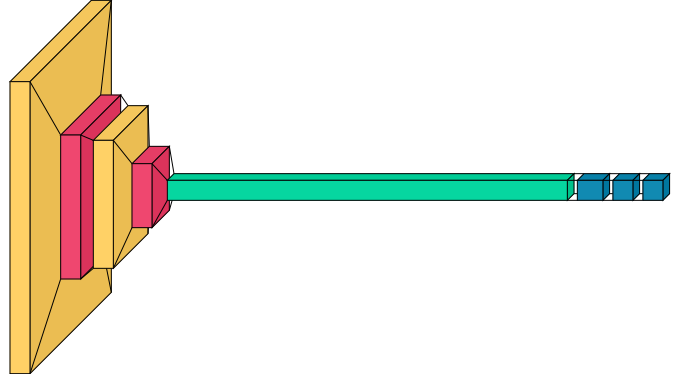

In [70]:
import visualkeras
visualkeras.layered_view(lenet5)

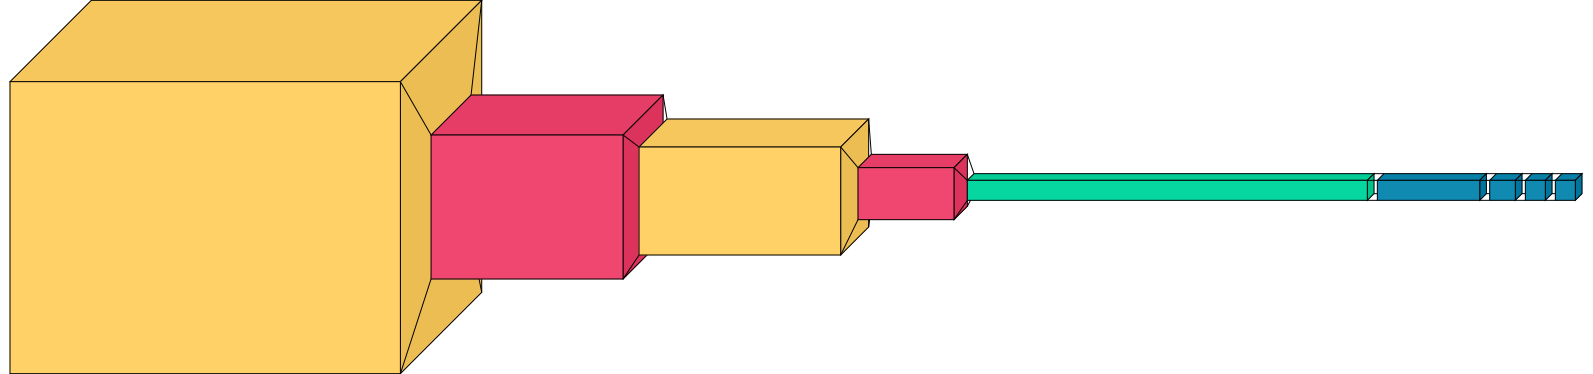

In [204]:
visualkeras.layered_view(m2lenet5)

## Embeddings from the first flat layer can be found using the weights in the model for each layer

In [74]:
lenet5.get_weights()[5].shape

(256,)

In [75]:
mlenet5.get_weights()[5].shape

(256,)

In [84]:
m2lenet5.get_weights()[5].shape

(1024,)

In [109]:
lenet5.layers[7].output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_2')>

In [120]:
#Creating embedding representations with the flat layer of 256 paramters for the base LeNet5 model
from keras import backend

lenet5_embed_model = backend.function([lenet5.layers[0].input],
                                  [lenet5.layers[5].output])
aut_lenet5_embed =lenet5_embed_model([oautism_scans])[0]
cont_lenet5_embed =lenet5_embed_model([ocontrol_scans])[0]

In [121]:
aut_lenet5_embed.shape

(408, 256)

In [122]:
oautism_scans.shape

(408, 61, 73, 61)

In [141]:
#representing the embedding representation using TSNE transformation

from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)
autism_tsne = tsne.fit_transform(aut_lenet5_embed)
controls_tsne = tsne.fit_transform(cont_lenet5_embed)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 3600x3600 with 0 Axes>

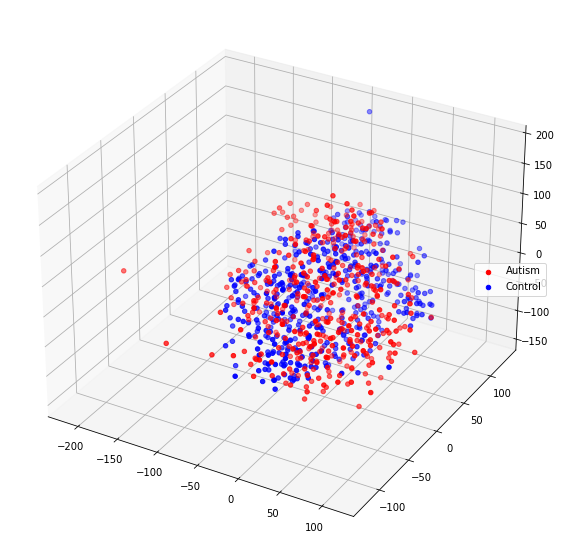

In [201]:
#Plotting the TSNE transformation

plt.figure(figsize=(50, 50))
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(autism_tsne[:,0],autism_tsne[:,1],autism_tsne[:,2], color='red')
ax.scatter(controls_tsne[:,1], controls_tsne[:,0],  controls_tsne[:,2],color='blue')
plt.legend(["Autism","Control"], loc='right')
plt.show()

In [161]:
#Creating a 1D reprentation for the input image

X_train=Xo_train.reshape(400,-1)
X_val=Xo_val.reshape(200,-1)
X_model=np.concatenate((X_train, X_val))
y_model=np.concatenate((yo_train, yo_val))
X_test=Xo_test.reshape(200,-1)

In [164]:
#Random Forest
cmodel = RandomForestClassifier().fit(X_model, y_model)
cscoresr2 = cross_validate(cmodel, X_model, y_model, scoring="accuracy", cv=crossvalidation, n_jobs=10, return_train_score=True)
print("Random Forest Training "+"Folds: " + str(len(cscoresr2['train_score'])) + ", Accuracy: " + str(np.mean(np.abs(cscoresr2['train_score']))) + ", STD: " + str(np.std(cscoresr2['train_score'])))
print("Random Forest Test "+"Folds: " + str(len(cscoresr2['test_score'])) + ", Accuracy: " + str(np.mean(np.abs(cscoresr2['test_score']))) + ", STD: " + str(np.std(cscoresr2['test_score'])))

Random Forest Training Folds: 5, AUC: 1.0, STD: 0.0
Random Forest Test Folds: 5, AUC: 0.5166666666666667, STD: 0.026352313834736484


In [177]:
from sklearn.metrics import accuracy_score, classification_report

y_randfor = cmodel.predict(X_test)
y_neural = m2lenet5.predict(X_test)
print("Acccuracy score with Random Forest: "+str(accuracy_score(yo_test, y_pred_test)))

Acccuracy score with Random Forest: 0.565


In [198]:
confusion_matrix(yo_test, y_randfor)

array([[59, 34],
       [53, 54]])

In [178]:
print(classification_report(yo_test, y_randfor))

              precision    recall  f1-score   support

         0.0       0.53      0.63      0.58        93
         1.0       0.61      0.50      0.55       107

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.56       200
weighted avg       0.57      0.56      0.56       200



In [180]:
y_neural = m2lenet5.predict(Xo_test)

7/7 [==============================] - 148s 21s/step


In [197]:
confusion_matrix(yo_test, y_neural_bool)

array([[  0,  93],
       [  0, 107]])

In [194]:
y_neural_bool=np.argmax(y_neural,axis=1)
print(classification_report(yo_test, y_neural_bool))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        93
         1.0       0.54      1.00      0.70       107

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.37       200



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
